## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 ## Load Dataset

In [3]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\data analytics\task5\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape, df.info(), df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


((891, 12),
 None,
         PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp

In [5]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:

df.drop_duplicates(inplace=True)
print('Duplicates removed. New shape:', df.shape)

Duplicates removed. New shape: (891, 12)


In [7]:
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20432\29675964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
df['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

##  Univariate Analysis
Look at single variables distributions.

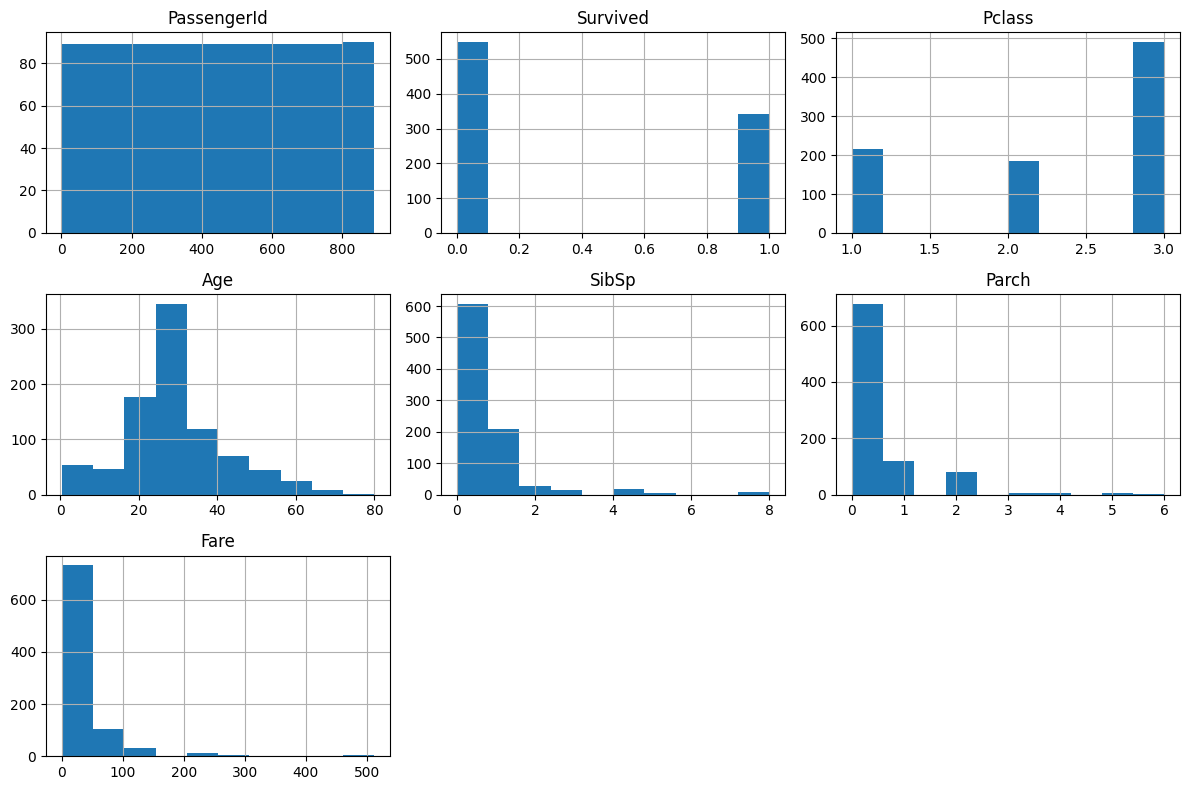

In [11]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

Age: Most passengers are between 20 and 40 years old; slight right skew.

Fare: Heavily right-skewed; most fares under $50 but some outliers above $500.

Survived: About 38% survived vs 62% did not.

Sex: About two-thirds male and one-third female.

Pclass: Majority of passengers in 3rd class.

##  Bivariate Analysis
Relationship between two variables.

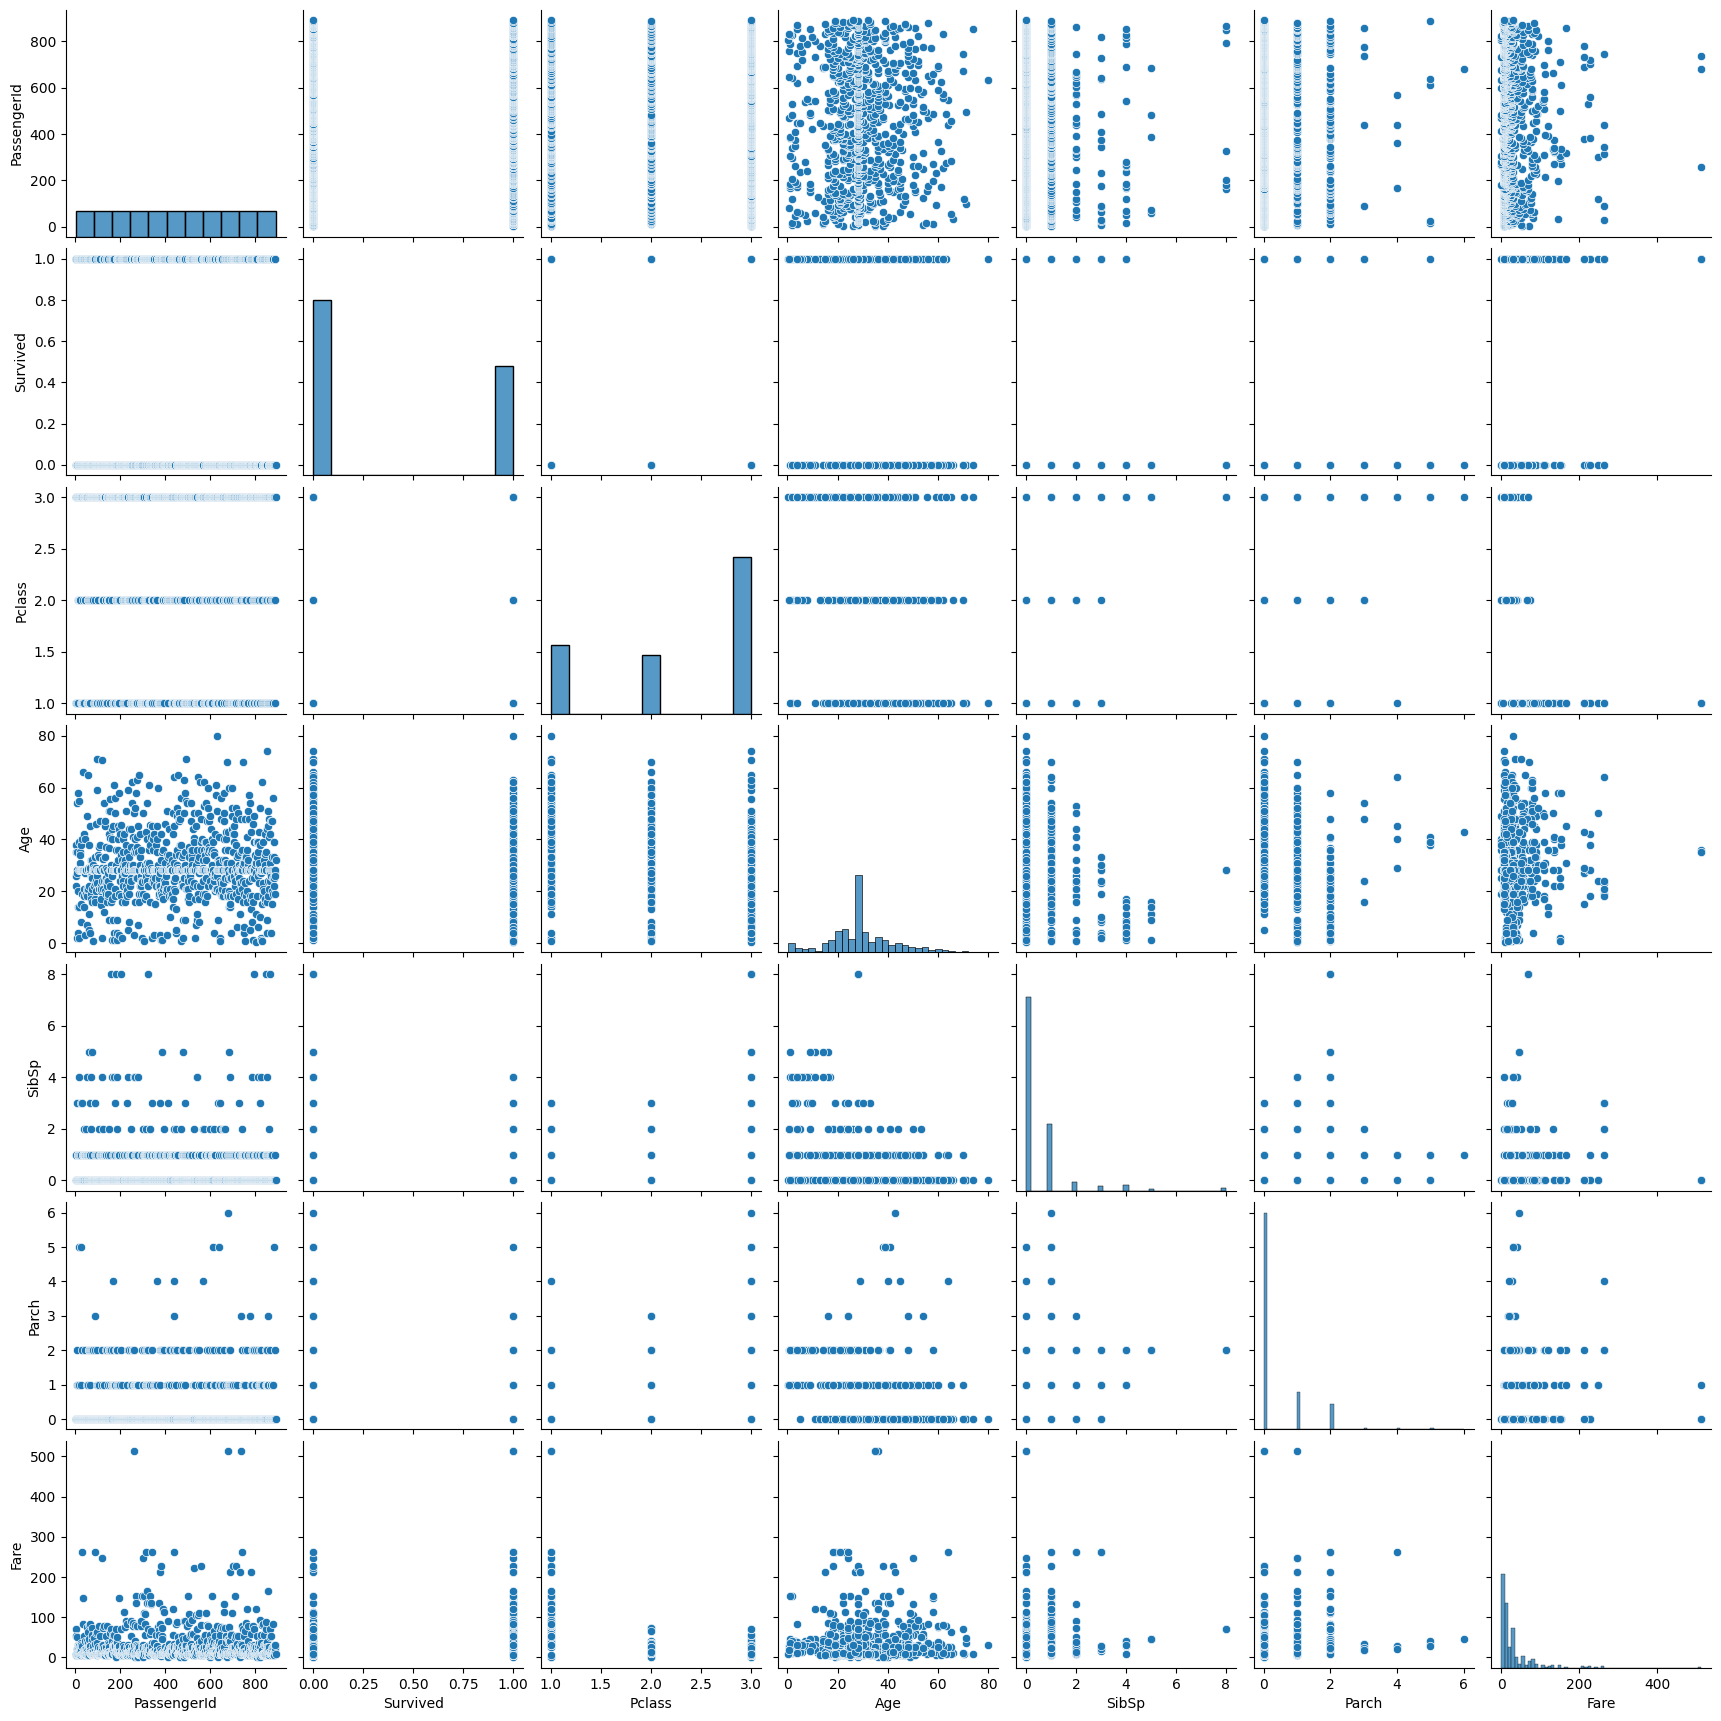

In [12]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

Confirms that survival probability clusters by gender and class.

Shows clear separation of some groups (female 1st class) vs (male 3rd class).

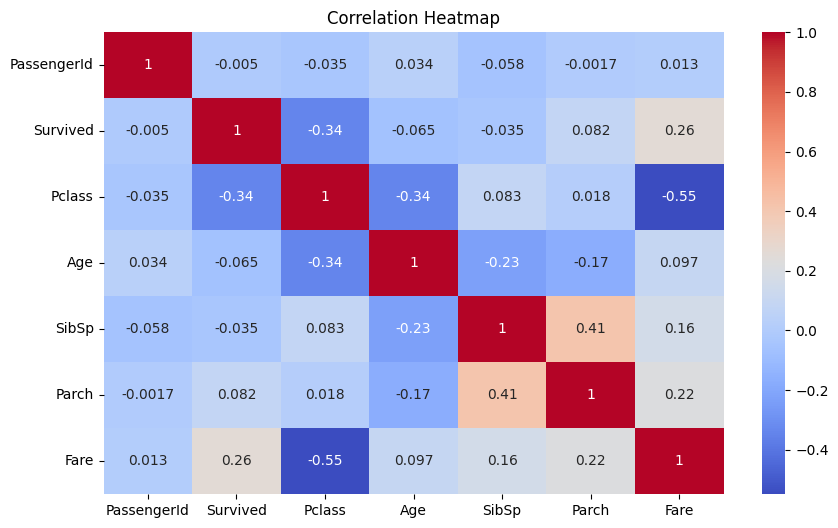

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Fare and Pclass are moderately correlated (lower class = lower fare).

Survived shows weak correlation with numeric variables except Fare.

No strong multicollinearity between numeric features.

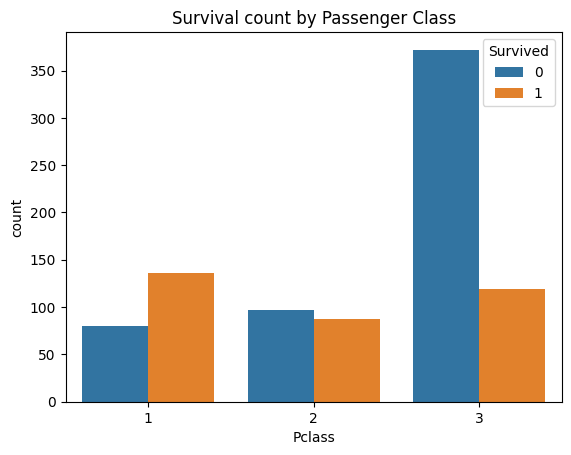

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival count by Passenger Class")
plt.show()


1st class passengers survived more: The orange bar  is highest for class 1 compared to its blue bar  survival rate is best in 1st class.

3rd class passengers mostly died: In class 3 the blue bar  is much taller than the orange bar  lowest survival rate in 3rd class.

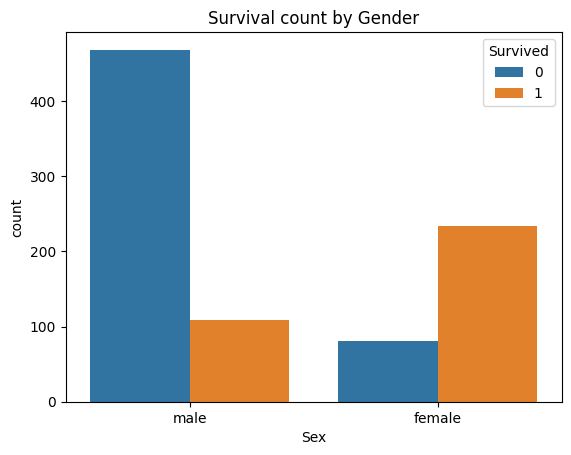

In [19]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival count by Gender")
plt.show()

Women survived at a much higher rate than men.

##  Skewness Check
Check skewness of numeric variables.

In [13]:
df.skew(numeric_only=True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

## Insights 
One-third of passengers survived; survival probability differs sharply by sex and class.

Wealthier passengers (higher Fare, higher class) survived more often.

Missing data mainly in Age and Cabin should be handled if modelling.

Data contains outliers (especially in Fare).

Visuals confirm strong patterns by demographic and ticket class.